In [121]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import sklearn.metrics as sklm
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [140]:
irisD = {'virginica': np.array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]]), 'setosa': np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2]]), 'versicolor': np.array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3]])}

# 14.1 Classification

In [8]:
tf2pm1 = lambda b:2*b-1 #convert T/F to 1 -1
b=True
tf2pm1(b)
b = np.array([True,False,True])
tf2pm1(b)

1

array([ 1, -1,  1])

In [115]:
numTP = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == True and yhat[i] == True])
numFN = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == True and yhat[i] == False])
numFP = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == False and yhat[i] == True])
numTN = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == False and yhat[i] == False]) 
confusion_matrix = lambda y,yhat: np.vstack([[numTP(y,yhat),numFN(y,yhat)],[numFP(y,yhat),numTN(y,yhat)]])
error_rate = lambda y,yhat: (numFN(y,yhat) + numFP(y,yhat)) / len(y)
error_rate2 = lambda y,yhat: np.average(y != yhat)

In [110]:
# y,yhat = np.random.choice(a = [True, False], size = (100)),np.random.choice(a = [True, False], size = (100))

In [116]:
#pseudo-seed to test between skl and Julia
y = np.array([False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
       False])
yhat = np.array([False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True])

In [122]:
confusion_matrix(y,yhat)
np.flip(sklm.confusion_matrix(y,yhat)) #sklm implementation is flipped relative to VMLS
error_rate(y,yhat)
error_rate2(y,yhat)

array([[32, 30],
       [15, 23]])

array([[32, 30],
       [15, 23]])

0.45

0.45

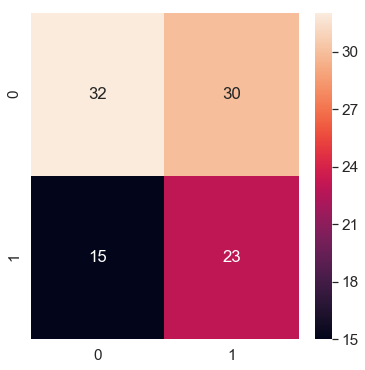

In [133]:
#optional confusion matrix vis template
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(confusion_matrix(y,yhat) )
sn.heatmap(df_cm, annot=True)


# 14.2 Least Squares Classifier

In [194]:
#fHat can be made via a regression model, and the > comparator
fTilde = lambda x: x@beta + v
fHat = lambda x: fTilde(x) > 0


iris = np.vstack([irisD["setosa"],irisD["versicolor"],irisD["virginica"]])
#if k == virginica: y[k] = True (1) ; else False (0)
y = np.hstack([np.full(50, False),np.full(50, False),np.full(50, True)])
A = np.hstack([np.ones((150,1)), iris])
theta = npl.lstsq(A,2*y-1)[0]
yhat = np.matmul(A,theta) > 0 #regression classifier 

confusion_matrix(y,yhat)
(C[0,1] + C[1,0]) / len(y)
np.average(y != yhat)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


array([[46,  4],
       [ 7, 93]])

0.07333333333333333

0.07333333333333333

# 14.3 Multi-class Classifiers

In [306]:
K = 4
y = np.random.randint(K,size=100)
yhat = np.random.randint(K,size=100)

In [307]:
error_rate = lambda y,yhat: np.average(y != yhat)
def confusion_matrix(y, yhat, K):
    C = np.zeros((K,K))
    for i in range(K):
        for j in range(K):
            C[i,j] = sum(np.logical_and(y == i, yhat == j))
    return C
C = confusion_matrix(y,yhat,K)
C
error_rate(y,yhat)
1-np.sum(np.diag(C))/np.sum(C)

array([[ 6., 11.,  8.,  9.],
       [ 8.,  7.,  5.,  6.],
       [ 4.,  3.,  6.,  3.],
       [ 7.,  7.,  3.,  7.]])

0.74

0.74

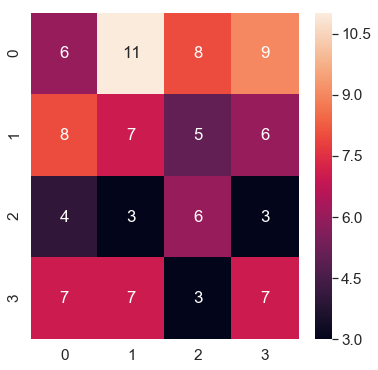

In [308]:
df_cm = pd.DataFrame(confusion_matrix(y,yhat,K) )
sn.heatmap(df_cm, annot=True)

In [284]:
#least squares multi-class classifier
A = np.random.randn(4,5)

In [296]:
row_argmax = lambda u:[np.argmax(u[i,:]) for i in range(np.size(u,0))]
col_argmax = lambda u:[np.argmax(u[:,i]) for i in range(np.size(u,1))]
row_argmax(A)
np.argmax(A,1)
col_argmax(A)
np.argmax(A,0)

[1, 4, 3, 4]

array([1, 4, 3, 4])

[1, 0, 2, 2, 1]

array([1, 0, 2, 2, 1])

In [439]:
#can use the following to find n-vector predictions of a data set with N examples 
#stored as nxN 'x', and theta is an nxK 
fhat = lambda x,theta: row_argmax(x@theta)

In [440]:
K = 4
ycl = np.random.randint(K,size=6)

In [442]:
#matrix least squares
def one_hot(ycl,K):
    N = len(ycl)
    Y = np.zeros((N,K))
    for j in range(K):
        Y[np.where(ycl==j),j] = 1
    return Y

In [457]:
def ls_multiclass(X,ycl,K):
    n,N = np.size(X),np.size(X) #debugging code left in on julia companion
    theta = npl.lstsq(X.T, (2*one_hot(ycl,K)-1))[0]
    yhat = np.argmax(np.matmul(X.T,theta),1)
    return theta,yhat

setosa = irisD["setosa"]
versicolor = irisD["versicolor"]
virginica = irisD["virginica"]
I1 = np.random.permutation(50)
I2 = np.random.permutation(50)
I3 = np.random.permutation(50)

#4x120 data matrix: 4 features per flower, 120 flowers
#transposed shape shows 4 arrays, 1 per feature, with 120 data pts in each
Xtrain = np.vstack([setosa[I1[:40],:],
          versicolor[I2[:40],:],
           virginica[I3[:40],:]]).T 
#add constant feature array 1, now shape 5x120
Xtrain = np.vstack([np.ones((1,120)),Xtrain]) 
Ytrain = np.vstack([np.full(40,1),np.full(40,2),np.full(40,3)]).ravel()

Xtest = np.vstack([setosa[I1[40:],:],
          versicolor[I2[40:],:],
           virginica[I3[40:],:]]).T 
Xtest = np.vstack([np.ones((1,30)),Xtest]) 
Ytest = np.vstack([np.full(10,1),np.full(10,2),np.full(10,3)]).ravel()

In [458]:
theta,yhat = ls_multiclass(Xtrain,Ytrain,3)
theta,yhat
Ctrain = confusion_matrix(Ytrain,yhat,3)
Ctrain
error_train = error_rate(Ytrain,yhat)
error_train
yhat = row_argmax(np.matmul(Xtest.T,theta))
Ctest = confusion_matrix(Ytest,yhat,3)
error_test = error_rate(Ytest,yhat)
Ctest
error_test

#performance is 2x worse than VLMS companion, need to revisit

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([[-1.00000000e+00, -8.73033404e-01,  2.23738964e+00],
        [-3.11414326e-16,  1.51403727e-01, -9.91707115e-02],
        [ 9.01482844e-16,  4.90757265e-01, -8.49216652e-01],
        [ 5.96967799e-16, -4.43634366e-01,  4.73792829e-01],
        [-8.24418191e-16, -1.43158749e-01, -1.00380638e+00]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 1]))

array([[ 0.,  0.,  0.],
       [ 0., 40.,  0.],
       [ 0.,  0., 40.]])

0.3333333333333333

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

0.36666666666666664